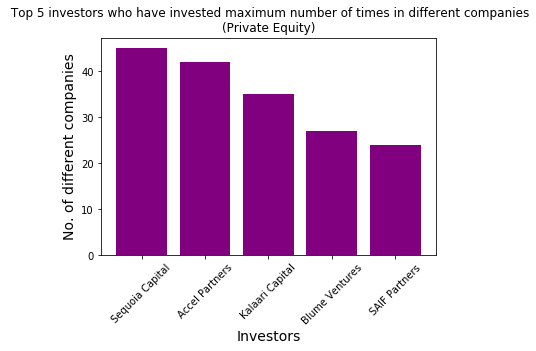

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('datasets/startup_funding.csv')
df=data.copy()
df=df[pd.notnull(df.InvestmentType)]
df.loc[df.InvestmentType=='SeedFunding', 'InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity', 'InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='Crowd funding', 'InvestmentType']='Crowd Funding'
df.reset_index(inplace=True, drop=True)
df=df[df.InvestmentType!='Crowd Funding']
df=df[df.InvestmentType!='Debt Funding']
df=df[df.InvestmentType!='Seed Funding']

df.reset_index(inplace=True, drop=True)

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic=dict()
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d=dict()
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='purple')
plt.xlabel('Investors', size=14)
plt.ylabel('No. of different companies', size=14)
plt.title(' Top 5 investors who have invested maximum number of times in different companies\n(Private Equity)', size=12)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])